In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from smol.plotting import  register_seaborn_palettes
import torch
import pandas as pd

sns.set_style("white")
register_seaborn_palettes()

In [3]:
a = torch.arange(-10, 10, step=0.05)  # N,
sigma_a = torch.sigmoid(a)  # N,

log_k = torch.tensor([-1, -0.5, 0, 0.5, 1])

k = torch.exp(log_k)  # M,

In [4]:
_datas = []
for x, _a in zip(sigma_a, a):
    _datas.append({
        "k": f"no_update",
        "a": _a.item(),
        "x": x.item(),
        "y0": x.item(),
        "y1": x.item(),
    })

for _k in k:
    sigma_a_k = torch.sigmoid(a - _k * sigma_a)
    sigma_a_k_plus = torch.sigmoid(a - _k * sigma_a + _k)
    for (x, _a, y0, y1) in zip(sigma_a, a, sigma_a_k, sigma_a_k_plus):
        _datas.append({
            "k": f"{_k.item():.2f}",
            "a": _a.item(),
            "x": x.item(),
            "y0": y0.item(),
            "y1": y1.item(),
        })
df = pd.DataFrame.from_records(_datas)

/tmp/ipykernel_3882/191431294.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=df, x="x", y="y0", hue="k", style="k", palette=cmap, ax=axes[0])
/tmp/ipykernel_3882/191431294.py:8: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=df, x="x", y="y1", hue="k", style="k", palette=cmap, ax=axes[1])


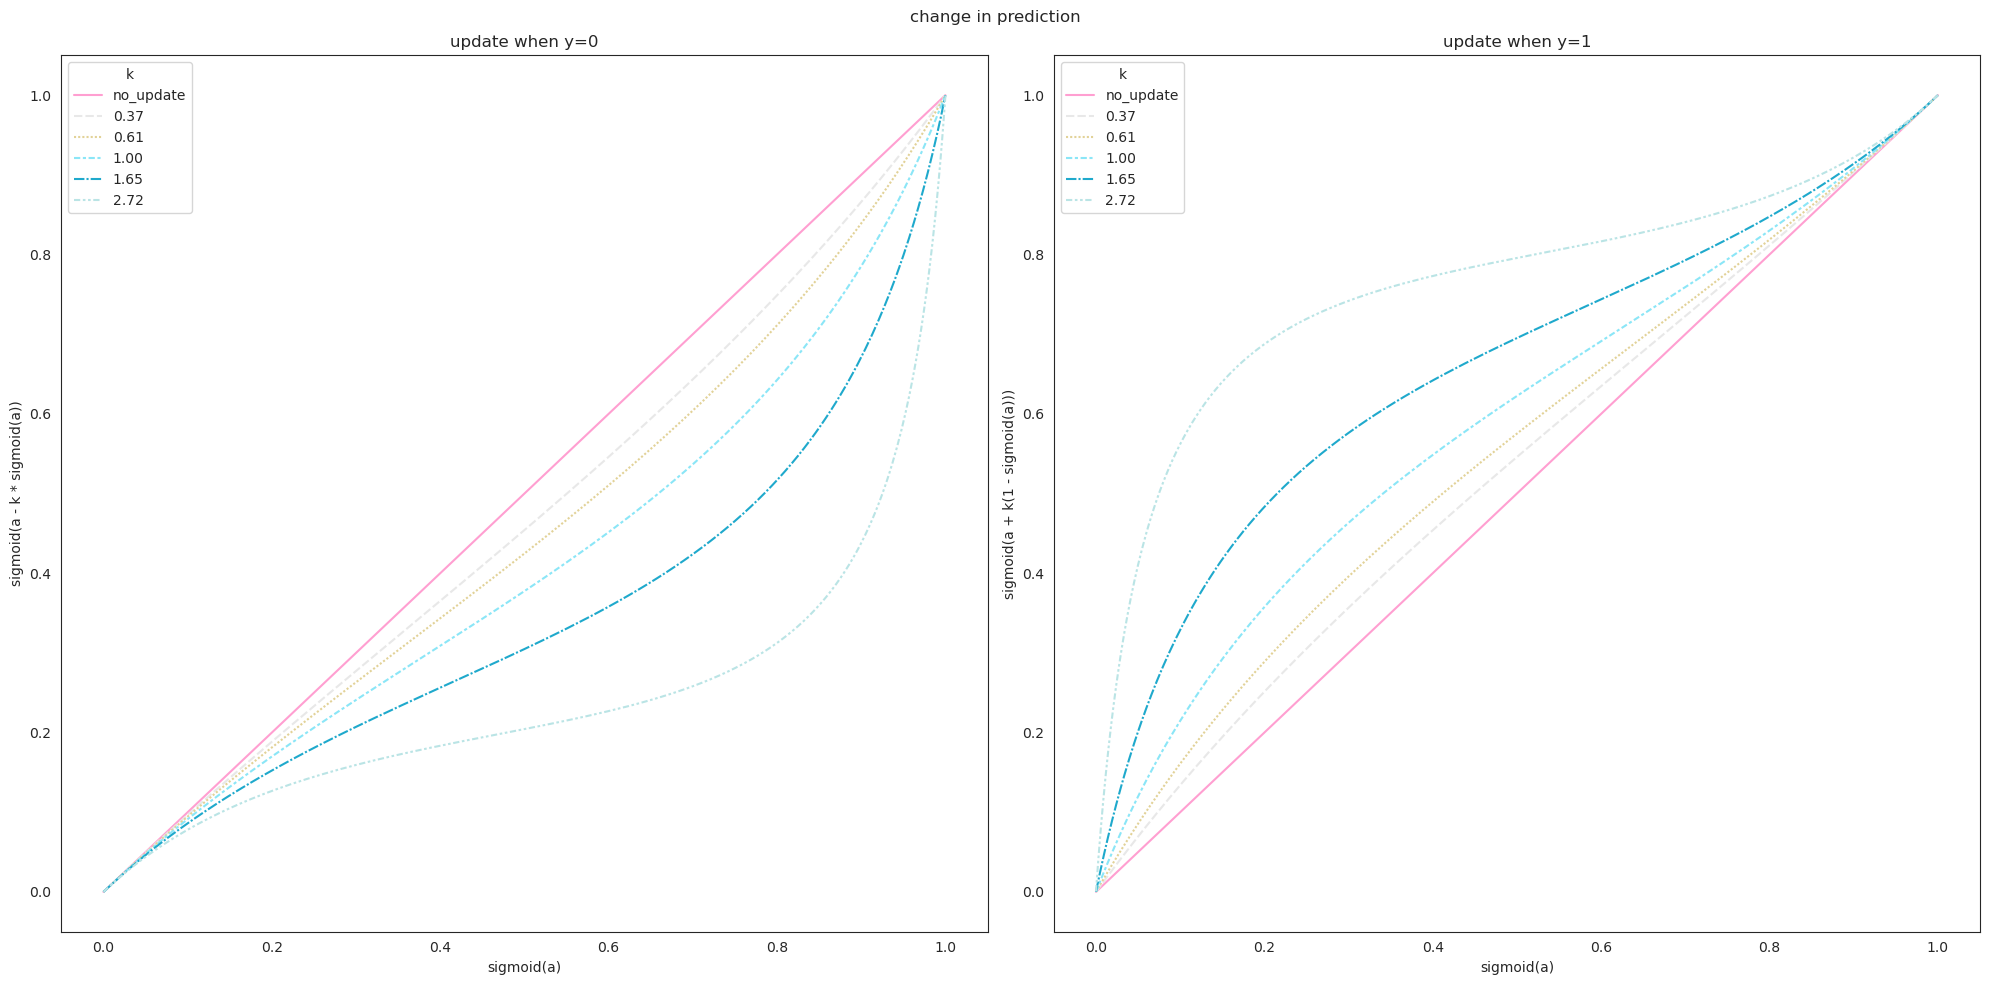

In [5]:

fig, axes = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
cmap = sns.color_palette("cherry_blossoms", n_colors=df.k.nunique(), as_cmap=True)
sns.lineplot(data=df, x="x", y="y0", hue="k", style="k", palette=cmap, ax=axes[0])
axes[0].set_xlabel("sigmoid(a)")
axes[0].set_ylabel("sigmoid(a - k * sigmoid(a))")
axes[0].set_title("update when y=0")

sns.lineplot(data=df, x="x", y="y1", hue="k", style="k", palette=cmap, ax=axes[1])
axes[1].set_xlabel("sigmoid(a)")
axes[1].set_ylabel("sigmoid(a + k(1 - sigmoid(a)))")
axes[1].set_title("update when y=1")

fig.suptitle("change in prediction")
fig.tight_layout()
plt.savefig("outputs/one_perceptron_pt2/sigma_vs_sigma.png", bbox_inches="tight")

In [6]:
sns.color_palette("cherry_blossoms", n_colors=df.k.nunique(), as_cmap=False)

[(1.0, 0.6235294117647059, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8862745098039215, 0.8235294117647058, 0.596078431372549),
 (0.5450980392156862, 0.9019607843137255, 0.9686274509803922),
 (0.12156862745098039, 0.6627450980392157, 0.8),
 (0.7294117647058823, 0.8941176470588236, 0.8980392156862745)]

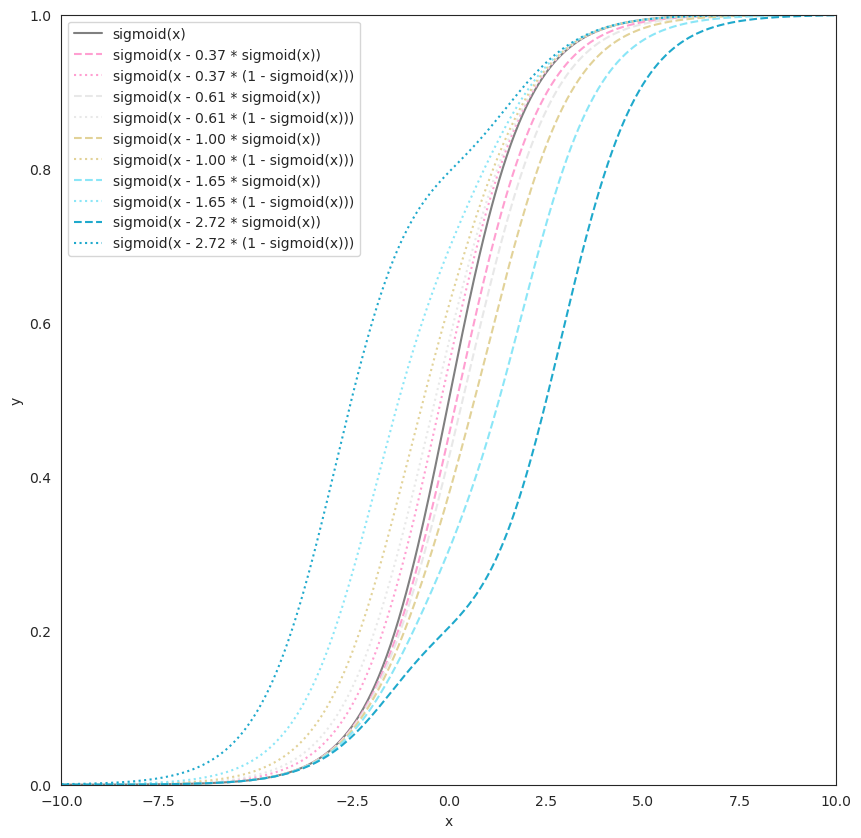

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)

ax.plot(a, sigma_a, label="sigmoid(x)", linestyle="solid", color="gray")

for i, _k in enumerate(k):
    color = cmap[i]
    sigma_a_k = torch.sigmoid(a - _k * sigma_a)
    ax.plot(a, sigma_a_k, linestyle="--", label=f"sigmoid(x - {_k:.2f} * sigmoid(x))", color=color)
    sigma_a_k_plus = torch.sigmoid(a - _k * sigma_a + _k)
    ax.plot(a, sigma_a_k_plus, linestyle=":", label=f"sigmoid(x - {_k:.2f} * (1 - sigmoid(x)))", color=color)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim((-10, 10))
ax.set_ylim((0, 1))

plt.legend(loc="best")
plt.savefig("outputs/one_perceptron_pt2/sigmas.png", bbox_inches="tight")

In [8]:
%%time

%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("white")
# matplotlib.use('nbAgg')

project_name = "smol_one_fp32_neuron"
group_name = "v11_sweep"
# print(os.environ.get("DISPLAY"))
# os.environ["DISPLAY"] = "localhost:0.0"
print(f"{plt.get_backend()=}")

import wandb
api = wandb.Api()
runs = api.runs(f"haroun7/{project_name}", filters={"group": group_name, "config.bias": True})

print(f"Loading {len(runs)} runs from {group_name=}")

dfs = []
for run in runs:
    df = run.history()
    dfs.append({
        "df": df,
        **run.config,
    })

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
plt.get_backend()='module://matplotlib_inline.backend_inline'
Loading 540 runs from group_name='v11_sweep'
CPU times: user 5.77 s, sys: 355 ms, total: 6.13 s
Wall time: 5min 20s


In [9]:
dfs[0]["df"].head()

,loss,weight,_timestamp,images/dataset,bias,parameters/graph_539bias,step,_step,_runtime,gradients/graph_539bias,parameters/graph_539weight,implicitly_estimated_threshold,gradients/graph_539weight
0,NaN,NaN,1.697470e+09,"{'size': 9857, 'height': 100, 'width': 800, '_...",NaN,None,NaN,0,4.391102,None,None,NaN,None
1,1.135891,0.233840,1.697470e+09,None,0.269729,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.0,1,4.490106,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-1.153481,"{'packedBins': {'min': -0.5793392062187195, 's..."
2,0.592586,0.889481,1.697470e+09,None,0.332921,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2.0,2,4.587909,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-0.374287,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,0.421253,1.286520,1.697470e+09,None,0.387135,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",3.0,3,4.685307,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-0.300916,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,0.351872,1.580203,1.697470e+09,None,0.437386,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",4.0,4,4.782472,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-0.276791,"{'packedBins': {'size': 0, 'count': 64, 'min':..."


In [10]:
import matplotlib.pyplot as plt
import plotly.express as px


def make_trajectory_plot(df_idx: int, ax: plt.Axes) -> None:
    # plt.figure(figsize=(4, 4))
    _df = dfs[df_idx]["df"][["step", "weight", "bias"]].dropna().sort_values("step")

    ax.plot(_df['weight'], _df['bias'], marker='o', linestyle='-', label="convergence")

    ax.plot(_df['weight'], -_df['weight'] * dfs[df_idx]["threshold"], label="correct")
    # plt.plot(_df['weight'], -_df['weight'] * dfs[df_idx]["threshold_upper"], label="upper")
    # plt.plot(_df['weight'], -_df['weight'] * dfs[df_idx]["threshold_lower"], label="lower")

    # Annotate the starting step
    start_step = int(_df['step'].iloc[0])
    start_x = _df['weight'].iloc[0]
    start_y = _df['bias'].iloc[0]

    ax.annotate(text=f"Step {start_step}", xy=(start_x, start_y - 0.008), xycoords="data")#, xytext=(-10, -10), textcoords="offset pixels", fontsize=35)

    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    n = dfs[df_idx]["n"]
    bs = dfs[df_idx]["batch_size"]
    lr = dfs[df_idx]["lr"]
    ax.set_title(f"{n=} {bs=} {lr=}", fontsize=12)


In [11]:
dfs_index = []
for idx, lol in enumerate(dfs):
    dfs_index.append((
        idx,
        lol["n"],
        lol["batch_size"],
        lol["lr"],
        lol["bias"],
        lol["threshold_type"],
    ))
dfs_index = pd.DataFrame.from_records(dfs_index, columns=["idx", "n", "batch_size", "lr", "bias", "threshold_type"])
dfs_index.head(3)

,idx,n,batch_size,lr,bias,threshold_type
0,0,16384,1.00,2.0,True,randn_0.25
1,1,16384,0.90,2.0,True,randn_0.25
2,2,16384,0.75,2.0,True,randn_0.25


6 [60, 69, 78, 87, 96, 105]


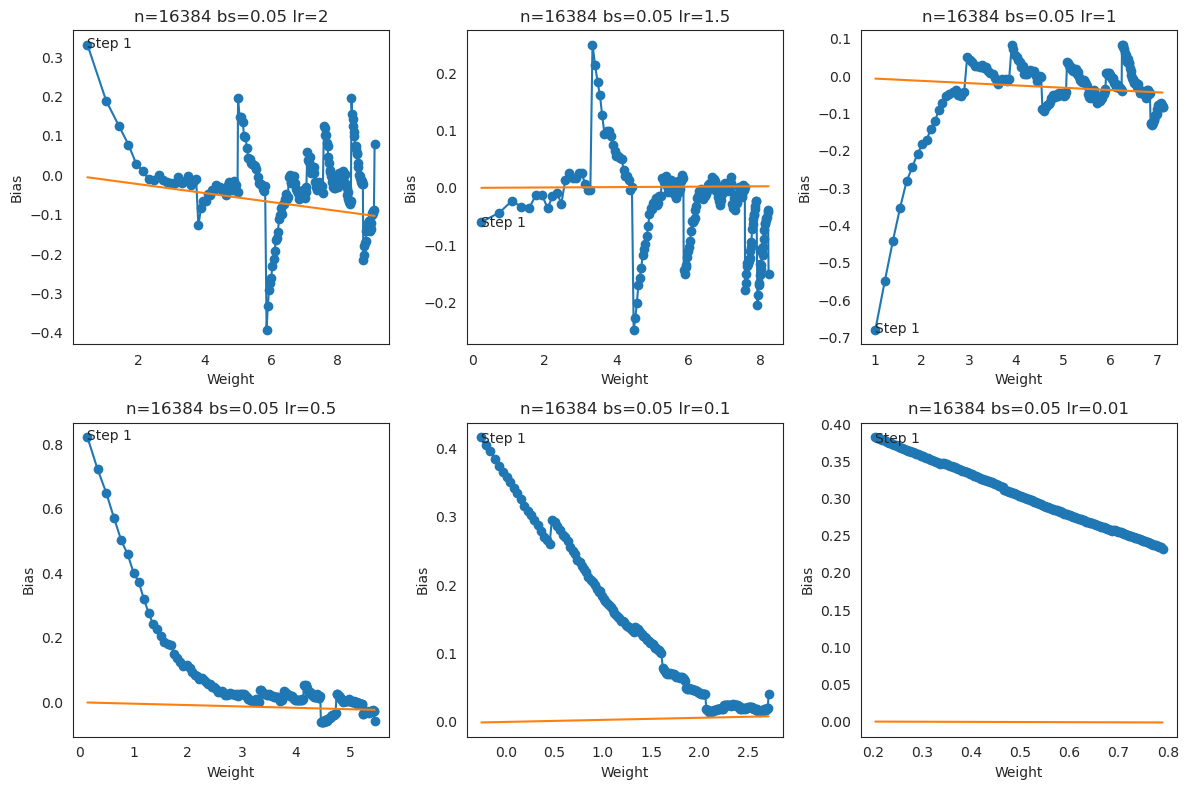

In [12]:
idxs = dfs_index[(dfs_index.n == 16384) & (dfs_index.batch_size == 0.05) & (dfs_index.bias == True) & (dfs_index.threshold_type == "median")].idx.to_list()
print(len(idxs), idxs)
nr = 2
nc = 3
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(nc * 4, nr * 4))
for i in range(nr):
    for j in range(nc):
        ax = axes[i, j]
        idx = i * nc + j
        df_idx = idxs[idx]
        make_trajectory_plot(df_idx, ax)
fig.tight_layout()
plt.savefig("outputs/trajectory_lr", bbox_inches='tight')


9 [81, 82, 83, 84, 85, 86, 87, 88, 89]


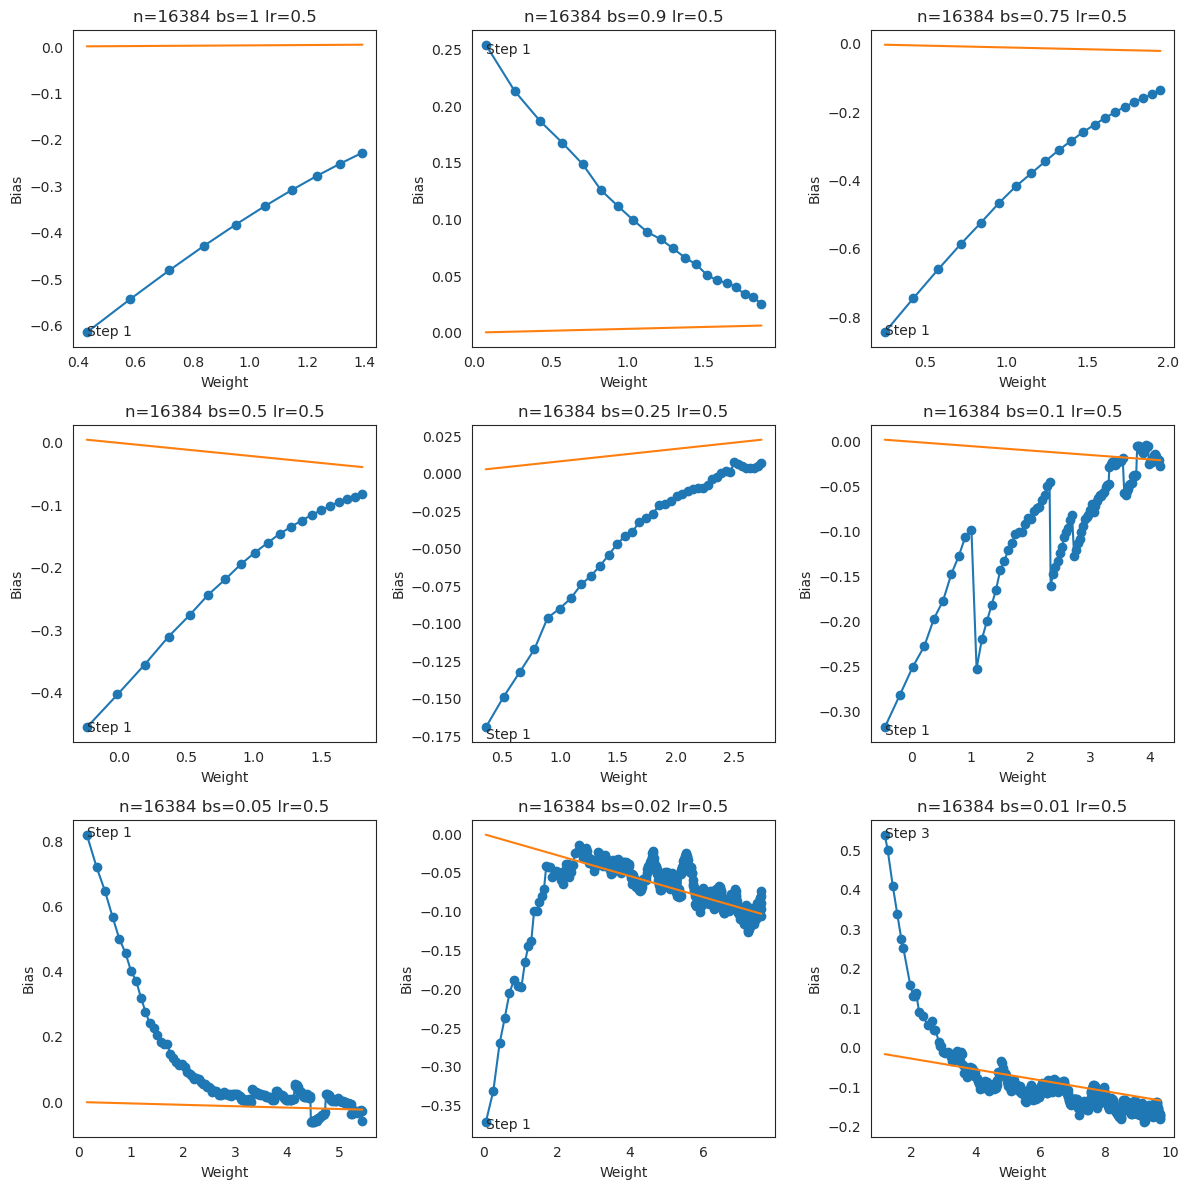

In [13]:
idxs = dfs_index[(dfs_index.n == 16384) & (dfs_index.bias == True) & (dfs_index.lr == 0.5) & (dfs_index.threshold_type == "median")].idx.to_list()
print(len(idxs), idxs)

nr = 3
nc = 3
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(nc * 4, nr * 4))
for i in range(nr):
    for j in range(nc):
        ax = axes[i, j]
        idx = i * nc + j
        df_idx = idxs[idx]
        make_trajectory_plot(df_idx, ax)
fig.tight_layout()

plt.savefig("outputs/trajectory_bs", bbox_inches='tight')

In [24]:
import numpy as np

# parameter = [w b] but as bits
def bitplot(idx: int) -> None:
    pass

idx = 0
_df = dfs[idx]["df"]
_df = _df[_df.step > 0]
w = _df.weight.to_numpy().astype(np.float32)
b = _df.bias.to_numpy().astype(np.float32)
step = _df.step

w

array([0.23383951, 0.8894814 , 1.2865196 , 1.580203  , 1.8179332 ,
       2.0200438 , 2.1972294 , 2.3558602 , 2.5000622 , 2.6326737 ],
      dtype=float32)

In [25]:
import struct

def float_to_bits(float_num):
    # Pack the floating-point number into its binary representation
    binary_representation = struct.pack('!f', float_num)

    # Convert the bytes to a binary string
    binary_string = ''.join(f'{byte:08b}' for byte in binary_representation)

    return binary_string

# Example usage
float_num = 3.14
bits_string = float_to_bits(float_num)
print(bits_string)
# Apply the float_to_bits function element-wise
vectorized_float_to_bits = np.vectorize(float_to_bits)
bits_array = vectorized_float_to_bits(w)
print(bits_array)

01000000010010001111010111000011
['00111110011011110111001110100000' '00111111011000111011010100001110'
 '00111111101001001010110010101101' '00111111110010100100010000011000'
 '00111111111010001011001000001001' '01000000000000010100100001100110'
 '01000000000011001001111101101000' '01000000000101101100011001101010'
 '01000000001000000000000100000101' '01000000001010000111110110111010']


In [33]:
import numpy as np

arr1 = np.array([5, 3, 7], dtype=np.uint8)
arr2 = np.array([3, 6, 5], dtype=np.uint8)
result = arr1 ^ arr2
print(result)

[6 5 2]


In [30]:
bool_array.nbytes

320

In [36]:
type(torch.int64)

torch.dtype

In [32]:
len(w)

10